##milopy basic installation and tutorial##

In [11]:
import scanpy as sc
import numpy as np

import milopy
import milopy.core as milo

In [16]:
# adata = sc.datasets.pbmc3k_processed()
# adata

adata = sc.read_h5ad('./write/GSE148218_processed.h5ad')
adata

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [20]:
#use scanpy functions to build a KNN graph

d = 30
k = 50

sc.pp.neighbors(adata, n_neighbors=k, n_pcs=d)

In [23]:
#This step assigns cells to a set of representative neighbourhoods on the KNN graph.
milo.make_nhoods(adata, prop=0.1)

In [25]:
adata.obsm["nhoods"]

<53007x3791 sparse matrix of type '<class 'numpy.float32'>'
	with 117573 stored elements in Compressed Sparse Row format>

In [27]:
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]


nhood_ixs_refined  nhood_kth_distance
AAAGCAACAGTTCATG-1                  1            6.080505
AAAGTAGAGCTACCTA-1                  1            8.265113
AAAGTAGGTAGAGTGC-1                  1            6.501912
AAATGCCCACGTCAGC-1                  1            5.258488
AAATGCCGTTCCATGA-1                  1            8.878072
...                               ...                 ...
TTGTTTGGTACGGTTT-1                  1            4.824154
TTTACTGTCTCTATGT-1                  1            5.065032
TTTCATGAGAACCGCA-1                  1            4.246612
TTTCATGCAAAGGCAC-1                  1            5.076300
TTTGATCGTCCGGATC-1                  1            4.270809

[3958 rows x 2 columns]

In [29]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);


NameError: name 'plt' is not defined

In [ ]:
## Build KNN graph
sc.pp.neighbors(adata, n_neighbors=10)

## Assign cells to neighbourhoods
milo.make_nhoods(adata)

## Count cells from each sample in each nhood
milo.count_nhoods(adata, sample_col="total_counts")

## Test for differential abundance between conditions
milo.DA_nhoods(adata, design="~ condition")

## Check results
milo_results = adata.uns["nhood_adata"].obs
milo_results

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ValueError: Length of values (3958) does not match length of index (3791)

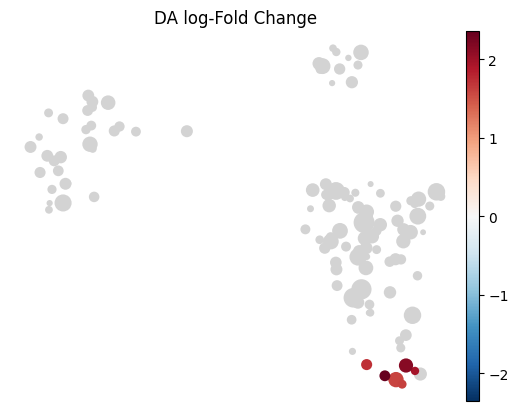

In [ ]:
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, alpha=0.2, min_size=5)

In [ ]:
# milopy.utils.annotate_nhoods(adata, anno_col='louvain')


Differential abundance analysis in python with milopy

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo  ## For mouse gastrulation data 
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

import milopy.core as milo
import milopy.plot as milopl

In [ ]:
adata = scvelo.datasets.gastrulation()

In [ ]:
adata

AnnData object with n_obs × n_vars = 89267 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

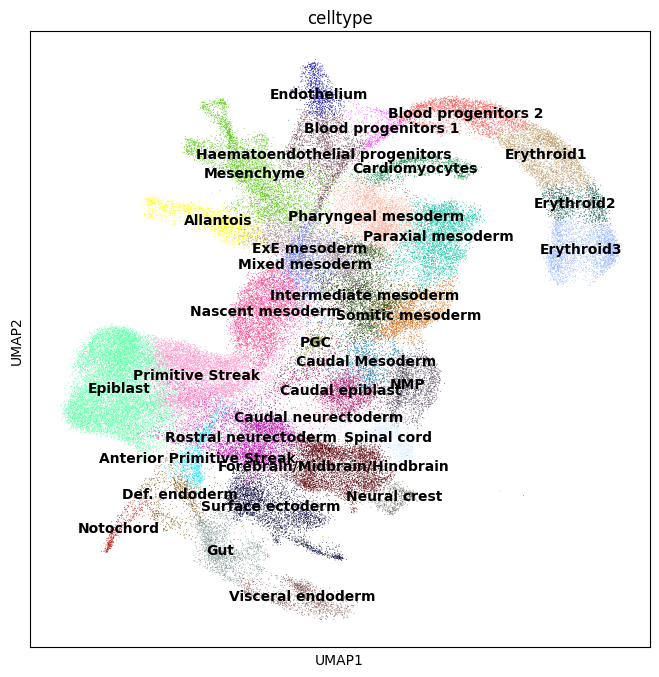

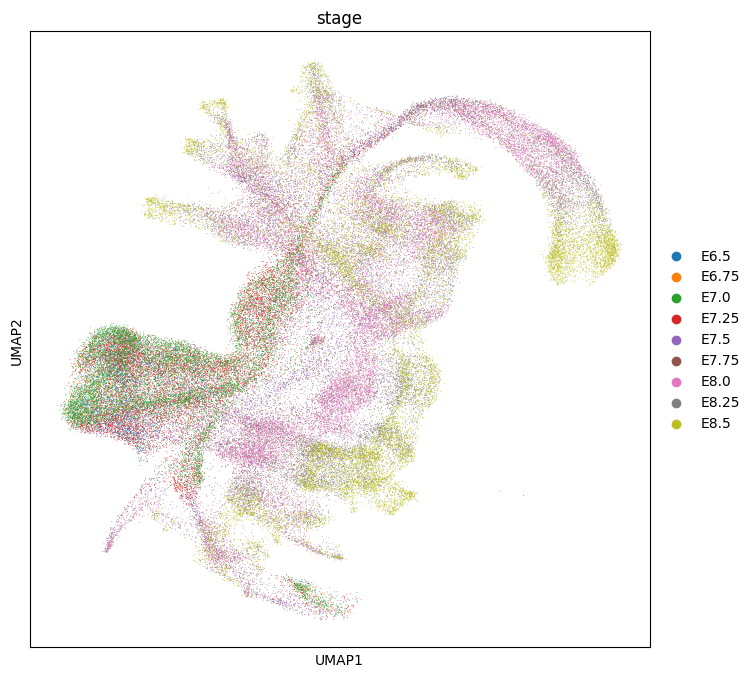

In [ ]:
sc.pl.umap(adata, color=["celltype"], legend_loc="on data");
sc.pl.umap(adata, color=["stage"]);

In [ ]:
d = 30
k = 50

sc.pp.neighbors(adata, n_neighbors=k, n_pcs=d)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:19)


In [ ]:
milo.make_nhoods(adata, prop=0.1)

In [ ]:
adata.obsm["nhoods"]

<89267x4558 sparse matrix of type '<class 'numpy.float32'>'
	with 593853 stored elements in Compressed Sparse Row format>

In [ ]:
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]

nhood_ixs_refined  nhood_kth_distance
index                                             
cell_230                     1            3.921264
cell_268                     1            4.179702
cell_401                     1            4.293635
cell_403                     1            5.405342
cell_617                     1            7.682445
...                        ...                 ...
cell_139055                  1            6.774024
cell_139159                  1            5.092332
cell_139206                  1            5.132385
cell_139212                  1            3.474515
cell_139296                  1            4.515578

[4558 rows x 2 columns]

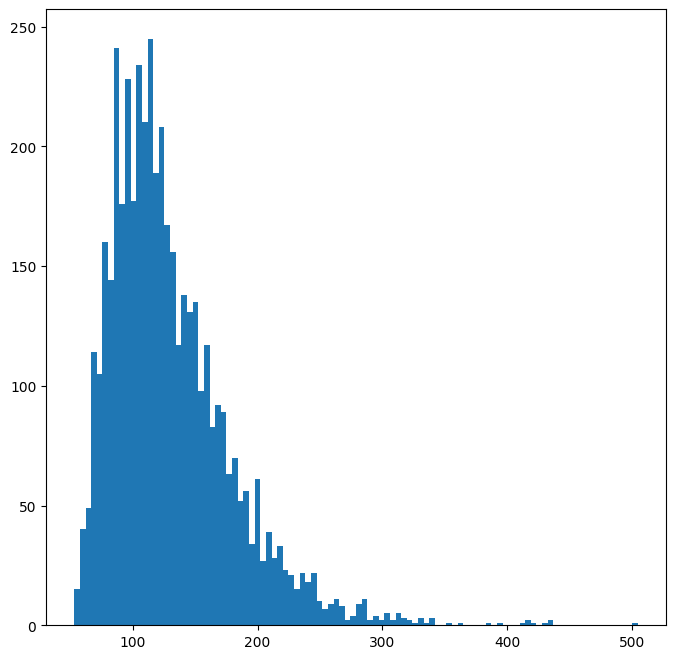

In [ ]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);


In [ ]:
milo.count_nhoods(adata, sample_col="sample")
adata.uns["nhood_adata"]
adata.obs["stage_continuous"] = adata.obs["stage"].cat.codes
milo.DA_nhoods(adata, design="~stage_continuous")

In [ ]:
adata.uns["nhood_adata"].obs


index_cell  kth_distance     logFC    logCPM           F        PValue  \
0        cell_230      3.921264 -1.467154  8.714289  185.755432  1.320111e-16   
1        cell_268      4.179702 -1.312406  8.524773  105.878390  2.799268e-13   
2        cell_401      4.293635  0.145622  8.674295    0.125138  7.252239e-01   
3        cell_403      5.405342  0.456820  8.330220    3.996096  5.181581e-02   
4        cell_617      7.682445  0.539216  8.564910    6.178718  1.680721e-02   
...           ...           ...       ...       ...         ...           ...   
4553  cell_139055      6.774024  1.319331  8.787448  119.103477  4.297817e-14   
4554  cell_139159      5.092332  1.390857  8.398578  128.972395  9.090921e-14   
4555  cell_139206      5.132385  1.264800  8.544171   97.490171  1.004185e-12   
4556  cell_139212      3.474515  1.715458  9.212690  226.960138  1.949244e-10   
4557  cell_139296      4.515578  1.589845  8.907594  156.666880  4.582087e-14   

               FDR    SpatialFDR  
0     7.078898e-15  7.678910e-15  
1     1.487070e-12  1.551825e-12  
2     7.395012e-01  7.380886e-01  
3     5.680050e-02  5.626586e-02  
4     1.894812e-02  1.873437e-02  
...            ...           ...  
4553  2.941359e-13  3.077740e-13  
4554  5.569411e-13  5.821416e-13  
4555  4.604703e-12  4.816163e-12  
4556  6.056341e-10  6.303509e-10  
4557  3.112542e-13  3.253945e-13  

[4558 rows x 8 columns]

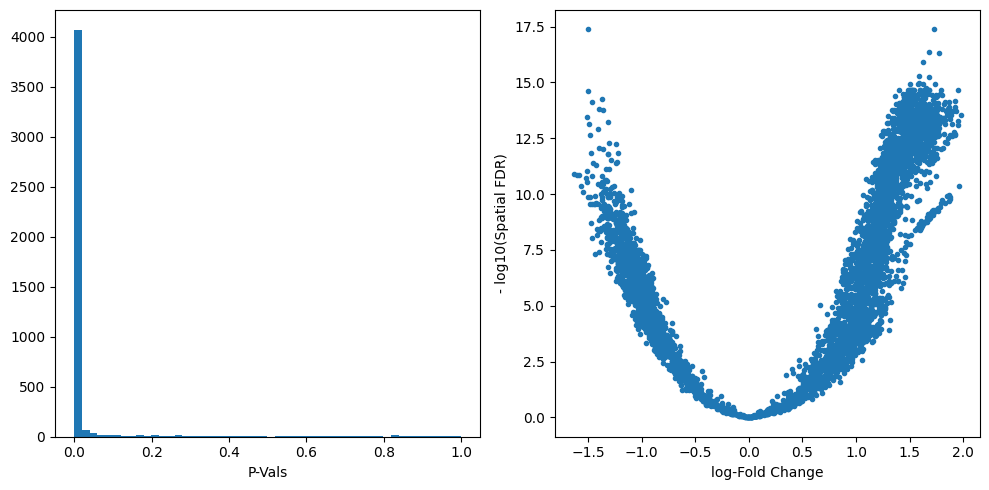

In [ ]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins=50);
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)");
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize


In [ ]:
import milopy.utils
milopy.utils.build_nhood_graph(adata)

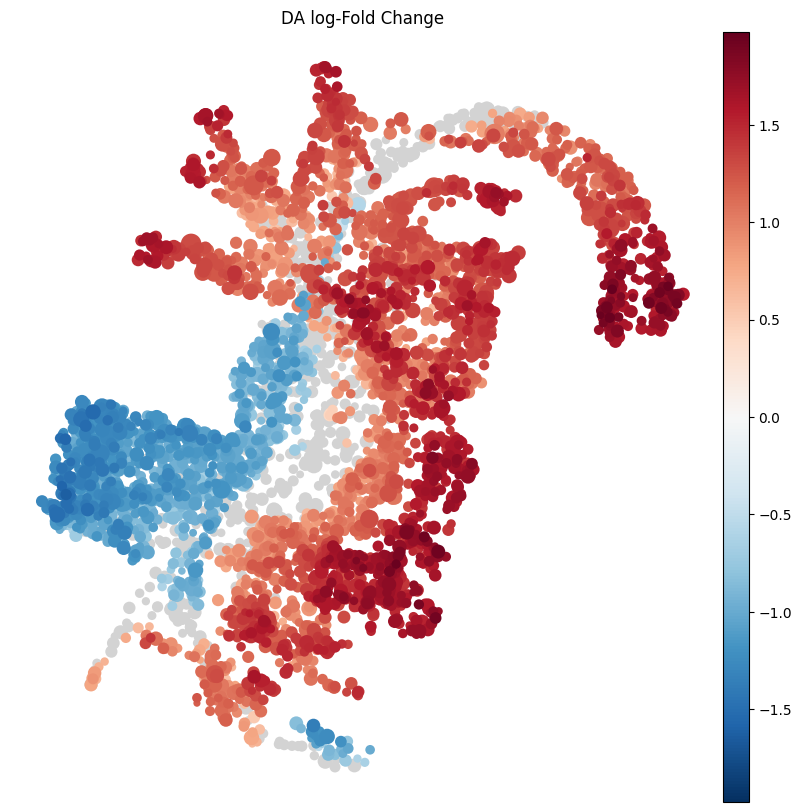

In [ ]:
plt.rcParams["figure.figsize"] = [10,10]
milopl.plot_nhood_graph(adata, 
                        alpha=0.01, ## SpatialFDR level (1%) 
                        min_size=2 ## Size of smallest dot
                       )

In [ ]:
adata.uns["nhood_adata"].obs


index_cell  kth_distance     logFC    logCPM           F        PValue  \
0        cell_230      3.921264 -1.467154  8.714289  185.755432  1.320111e-16   
1        cell_268      4.179702 -1.312406  8.524773  105.878390  2.799268e-13   
2        cell_401      4.293635  0.145622  8.674295    0.125138  7.252239e-01   
3        cell_403      5.405342  0.456820  8.330220    3.996096  5.181581e-02   
4        cell_617      7.682445  0.539216  8.564910    6.178718  1.680721e-02   
...           ...           ...       ...       ...         ...           ...   
4553  cell_139055      6.774024  1.319331  8.787448  119.103477  4.297817e-14   
4554  cell_139159      5.092332  1.390857  8.398578  128.972395  9.090921e-14   
4555  cell_139206      5.132385  1.264800  8.544171   97.490171  1.004185e-12   
4556  cell_139212      3.474515  1.715458  9.212690  226.960138  1.949244e-10   
4557  cell_139296      4.515578  1.589845  8.907594  156.666880  4.582087e-14   

               FDR    SpatialFDR  Nhood_size  
0     7.078898e-15  7.678910e-15        75.0  
1     1.487070e-12  1.551825e-12        65.0  
2     7.395012e-01  7.380886e-01        97.0  
3     5.680050e-02  5.626586e-02        84.0  
4     1.894812e-02  1.873437e-02        97.0  
...            ...           ...         ...  
4553  2.941359e-13  3.077740e-13        94.0  
4554  5.569411e-13  5.821416e-13        63.0  
4555  4.604703e-12  4.816163e-12        89.0  
4556  6.056341e-10  6.303509e-10       113.0  
4557  3.112542e-13  3.253945e-13        97.0  

[4558 rows x 9 columns]

In [ ]:
import scipy
anno_dummies = pd.get_dummies(adata.obs['celltype'])
anno_count = adata.obsm["nhoods"].T.dot(scipy.sparse.csr_matrix(anno_dummies.values))
anno_frac = np.array(scipy.sparse.csr_matrix(anno_count/anno_count.sum(1)))
anno_frac

array(<4558x34 sparse matrix of type '<class 'numpy.float32'>'
	with 10177 stored elements in Compressed Sparse Row format>, dtype=object)

In [ ]:
anno_frac.shape

(4558, 34)

In [ ]:
adata.uns["nhood_adata"].obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4548', '4549', '4550', '4551', '4552', '4553', '4554', '4555', '4556',
       '4557'],
      dtype='object', length=4558)

In [ ]:
anno_dummies.columns

CategoricalIndex(['Allantois', 'Anterior Primitive Streak',
                  'Blood progenitors 1', 'Blood progenitors 2',
                  'Cardiomyocytes', 'Caudal Mesoderm', 'Caudal epiblast',
                  'Caudal neurectoderm', 'Def. endoderm', 'Endothelium',
                  'Epiblast', 'Erythroid1', 'Erythroid2', 'Erythroid3',
                  'ExE mesoderm', 'Forebrain/Midbrain/Hindbrain', 'Gut',
                  'Haematoendothelial progenitors', 'Intermediate mesoderm',
                  'Mesenchyme', 'Mixed mesoderm', 'NMP', 'Nascent mesoderm',
                  'Neural crest', 'Notochord', 'PGC', 'Paraxial mesoderm',
                  'Pharyngeal mesoderm', 'Primitive Streak',
                  'Rostral neurectoderm', 'Somitic mesoderm', 'Spinal cord',
                  'Surface ectoderm', 'Visceral endoderm'],
                 categories=['Allantois', 'Anterior Primitive Streak', 'Blood progenitors 1', 'Blood progenitors 2', ..., 'Somitic mesoderm', 'Spinal cord', 

In [ ]:
anno_frac = pd.DataFrame(anno_frac,
                          columns=anno_dummies.columns,
                          index=adata.uns["nhood_adata"].obs_names
)

ValueError: Must pass 2-d input. shape=()

In [ ]:
anno_frac

0
0            (0, 10)\t0.9866667\n  (0, 28)\t0.013333334
1                                          (0, 10)\t1.0
2       (0, 6)\t0.030927833\n  (0, 28)\t0.020618556\...
3                                          (0, 19)\t1.0
4            (0, 16)\t0.21649484\n  (0, 33)\t0.78350514
...                                                 ...
4553        (0, 16)\t0.98936164\n  (0, 32)\t0.010638298
4554         (0, 5)\t0.015873017\n  (0, 21)\t0.98412704
4555         (0, 18)\t0.123595506\n  (0, 27)\t0.8764045
4556                                       (0, 13)\t1.0
4557    (0, 15)\t0.030927833\n  (0, 21)\t0.010309278...

[4558 rows x 1 columns]

In [ ]:
# from scipy.sparse import csr_matrix

In [ ]:
# csr_matrix(anno_frac)

In [ ]:
# adata.obs['stage_continuous']= adata.obs['stage_continuous'].astype("category")
milopy.utils.annotate_nhoods(adata, anno_col='celltype')


ValueError: Shape of passed values is (4558, 1), indices imply (4558, 34)

In [ ]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"]);
plt.xlabel("celltype fraction")


KeyError: 'nhood_annotation_frac'

In [ ]:
adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"


In [ ]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby="nhood_annotation", rotation=90, show=False);
plt.axhline(y=0, color='black', linestyle='--');
plt.show()